# ML using LTEA data

This notebook develops functions to extract the various datasets for chemical, hybrid and bioactivity fingerprints relative to toxicity outcomes. Toxicity outcomes count plots are also created. Machine learning for the unbalanced datasets for toxicity outcomes with at least 50 positives and negatives.

In [1]:
#%load_ext autoreload
#%autoreload 2
#%pylab inline
#%matplotlib inline
#%load_ext rpy2.ipython

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import sys
#import rpy2 
import os, sys

%matplotlib inline


In [2]:
from box import Box
import glob

In [3]:
TOP = os.getcwd().replace("notebooks/tt", "")
D1 = TOP + 'data/'
figures_dir = TOP + 'manuscript/figures/'

## CHM

Chemical Data

-Chemical names:DTXSID, preferred_name
-toxprints: toxp_*
-morgan fps: mrgn_*
-topological torsion fps: tptr_*

There are some blank spaces which we will replace with na and remove

In [4]:
CHM1 = pd.read_csv(D1 + 'S7-chem.tsv', sep='\t', low_memory=False)
CHM1 = CHM1.replace(['-'], np.nan)
CHM1.isnull().values.any()
CHM1 = CHM1.dropna()
CHM1
CHM1_nm = CHM1[['DTXSID', 'PREFERRED_NAME']].set_index('DTXSID')
X = CHM1 = CHM1.drop(['PREFERRED_NAME'], axis=1).set_index('DTXSID')

CHM11 = Box()
for i in set([i[0] for i in X.columns.str.split('_') ]):
    CHM11[i] =  X[X.columns[X.columns.str.match(i)]]
CHM11['all'] = X

In [5]:
CHM11.keys()

dict_keys(['mrgn', 'toxp', 'tptr', 'all'])

In [6]:
CHM11['tptr']

,tptr_0,tptr_1,tptr_2,tptr_3,tptr_4,tptr_5,tptr_6,tptr_7,tptr_8,tptr_9,...,tptr_2038,tptr_2039,tptr_2040,tptr_2041,tptr_2042,tptr_2043,tptr_2044,tptr_2045,tptr_2046,tptr_2047
DTXSID,,,,,,,,,,,,,,,,,,,,,
DTXSID9020035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID2020260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID2021735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID8041030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID6021080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID9047592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID8027581,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID8022325,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## BIO

Biological Binary data

Organizing Biological data

    -gene_* gene level hitc data 
    -assay_* assay level hitcac50 data

In [7]:
BIO1 = pd.read_csv(D1+'S2-bio.tsv', sep='\t') 
BIO1 = BIO1.rename(columns = {'dsstox_substance_id':'DTXSID'})

BIO1 = BIO1.drop(['chnm', 'casn'], axis = 1).set_index('DTXSID')
BIO11 = Box()
for i in set([i[0] for i in BIO1.columns.str.split('_')]):
    BIO11[i]=BIO1[BIO1.columns[BIO1.columns.str.match(i)]]
BIO11['all']=BIO1

## BIO2

Biological Continuous Data

Organising Biological data

    -gene_* gene level bio data 

## TOX

Toxicity Data

All pos and negative endpoints in ToxrefDBv2.0


In [8]:
TOX1 = pd.read_csv(D1+'S1-tox.tsv', sep='\t')

TOX1 = TOX1.rename(columns = {'dsstox_substance_id':'DTXSID'})
TOX1 = TOX1.drop(['preferred_name'], axis=1).set_index('DTXSID')
#set([i[0] for i in TOX1.columns.str.split('_')])
TOX11 = Box()
for i in set([i[0] for i in TOX1.columns.str.split('_')]):
    TOX11[i] = TOX1[TOX1.columns[TOX1.columns.str.match(i)]]
TOX11['all'] = TOX1

In [74]:
#TOX1['dnt_clinical_signs'].value_counts()

In [10]:
list(TOX11.keys())

['dnt', 'dev', 'acu', 'mgr', 'chr', 'sub', 'sac', 'oth', 'rep', 'neu', 'all']

## DATA FILE

In [11]:
DATA = Box(chm=CHM11,bio=BIO11,tox=TOX11)
DATA['bc'] = Box()

for c,b in [(i,j) for i in CHM11.keys() for j in BIO11.keys()]:
    print(b,c)
    DATA['bc']['{}_{}'.format(b,c)] = CHM11[c].merge(BIO11[b],left_index=True,right_index=True)

assay mrgn
gene mrgn
all mrgn
assay toxp
gene toxp
all toxp
assay tptr
gene tptr
all tptr
assay all
gene all
all all


In [12]:
list(DATA.keys())

['chm', 'bio', 'tox', 'bc']

In [13]:
list(DATA.bc.keys())

['assay_mrgn',
 'gene_mrgn',
 'all_mrgn',
 'assay_toxp',
 'gene_toxp',
 'all_toxp',
 'assay_tptr',
 'gene_tptr',
 'all_tptr',
 'assay_all',
 'gene_all',
 'all_all']

## getData Function

In [14]:
def getData(b,dt='chm',st='all',Data=DATA):
    """
    Return an input and output dataframe for analysis
    
    b = toxicity class
    dt= input data type (chm or bio)
    st= inpute subdata type ()
    """
    
    Y = Data.tox.all[b].dropna()
    INT=Data[dt][st].index.intersection(Y.index)
    if len(INT)>0:
        Yf= Y.copy()[INT]
        Yf[Yf>0]=1
        Yb = Yf.copy()
        Yb = Yb.astype(np.int32)
        X  = Data[dt][st].loc[INT].fillna(0)
    else:
        pass
    
    return X,Yb
    

In [15]:
type(DATA['tox'])

box.box.Box

In [16]:
DATA.tox.chr.head()

,chr_5._nucleotidase,chr_.other.,chr_adrenal_gland,chr_alanine_aminotransferase_.alt.sgpt.,chr_albumin,chr_albumin.globulin_ratio,chr_alderin_epoxidase,chr_alkaline_phosphatase_.alp.alk.,chr_alpha.1_globulin,chr_alpha.2_globulin,...,chr_urea_nitrogen,chr_ureter,chr_urethra,chr_urinary_bladder,chr_urobilinogen,chr_uterus,chr_vagina,chr_volume,chr_water_consumption,chr_zymbal.s_gland
DTXSID,,,,,,,,,,,,,,,,,,,,,
DTXSID0020151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID0020232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0
DTXSID0020311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID0020315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID0020319,0.0,10.0,0.0,13.9,10.0,0.0,0.0,0.0,0.0,0.0,...,175.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0


In [17]:
DATA.tox.all.head()

,acu_calcium,acu_clinical_signs,acu_intestine_large,acu_intestine_small,acu_lung,acu_mortality,acu_stomach,chr_5._nucleotidase,chr_.other.,chr_adrenal_gland,...,sub_ureter,sub_urethra,sub_uric_acid,sub_urinary_bladder,sub_urobilinogen,sub_uterus,sub_vagina,sub_volume,sub_water_consumption,sub_zinc
DTXSID,,,,,,,,,,,,,,,,,,,,,
DTXSID0020151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID0020232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTXSID0020311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID0020315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTXSID0020319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
DATA.chm.mrgn.shape

(1017, 2048)

#### Figuring out the number of chemicals and the number of target organ/effects per study type

In [19]:
tox_effects = DATA.tox.all.columns.tolist()

In [20]:
import re

In [21]:
p = re.compile('^\w{3}\_')

In [22]:
len(set([p.split(a)[1] for a in tox_effects]))

252

In [23]:
pos_neg = []
for Effect in DATA.tox.all:
    Yf = DATA.tox.all[Effect].dropna()
    Yf[Yf>0]=1
    Yb = Yf.copy()
    Yb = Yb.astype(np.int32)
    print(Effect, Yb.value_counts())
    pos_neg.append(Yb.value_counts())
df_tox_counts = pd.concat(pos_neg, axis =1)

acu_calcium 1    2
0    1
Name: acu_calcium, dtype: int64
acu_clinical_signs 0    2
1    1
Name: acu_clinical_signs, dtype: int64
acu_intestine_large 0    2
1    1
Name: acu_intestine_large, dtype: int64
acu_intestine_small 0    2
1    1
Name: acu_intestine_small, dtype: int64
acu_lung 0    2
1    1
Name: acu_lung, dtype: int64
acu_mortality 0    2
1    1
Name: acu_mortality, dtype: int64
acu_stomach 0    2
1    1
Name: acu_stomach, dtype: int64
chr_5._nucleotidase 0    514
1      2
Name: chr_5._nucleotidase, dtype: int64
chr_.other. 0    491
1     25
Name: chr_.other., dtype: int64
chr_adrenal_gland 0    389
1    127
Name: chr_adrenal_gland, dtype: int64
chr_alanine_aminotransferase_.alt.sgpt. 0    433
1     83
Name: chr_alanine_aminotransferase_.alt.sgpt., dtype: int64
chr_albumin 0    477
1     39
Name: chr_albumin, dtype: int64
chr_albumin.globulin_ratio 0    494
1     22
Name: chr_albumin.globulin_ratio, dtype: int64
chr_alderin_epoxidase 0    515
1      1
Name: chr_alderin_epoxid

In [70]:
df_tox_counts['dnt_clinical_signs']

1    49
0    44
Name: dnt_clinical_signs, dtype: int64

### Figure 1

In [25]:
df_tox_counts.to_csv(D1+'tox_counts.csv')

In [26]:
tox_counts = df_tox_counts.T.reset_index()

In [27]:
p2 = re.compile('^\w{3}\_')

In [28]:
tox_counts['target_endpoints'] = [[p2.findall(a)[0], p.split(a)[1]] for a in tox_counts['index']]

In [29]:
tox_counts.columns = ['effect', 'pos', 'neg', 'target_endpoints']

In [30]:
tox_counts = pd.concat([tox_counts['target_endpoints'].apply(pd.Series), tox_counts[['effect', 'pos', 'neg', 'target_endpoints']]], axis = 1)
#pd.concat([df[0].apply(pd.Series), df[1]], axis = 1)

In [31]:
tox_counts[0].unique()

array(['acu_', 'chr_', 'dev_', 'dnt_', 'mgr_', 'neu_', 'oth_', 'rep_',
       'sac_', 'sub_'], dtype=object)

In [32]:
tox_dict = {'acu_': 'ACU', 'chr_': 'CHR', 'dev_': 'DEV', 'dnt_': 'DNT', 'mgr_': 'MGR', 'neu_': 'NEU', 'oth_': 'OTH', 'rep_': 'REP',
       'sac_': 'SAC', 'sub_': 'SUB'}

In [33]:
tox_counts[0] = tox_counts[0].replace(tox_dict)

In [34]:
tox_counts[1] = [e.upper() for e in tox_counts[1]]

In [35]:
tox_counts.columns = ['STUDY','EFFECT', 'effect', 'POS', 'NEG', 'target_endpoints']

In [36]:
tox_counts.drop(['effect', 'target_endpoints'], axis = 1, inplace = True)

In [37]:
tox_counts[(tox_counts['STUDY'] == 'DNT') & (tox_counts['POS'] >= 45) & (tox_counts['NEG'] >= 40)]

,STUDY,EFFECT,POS,NEG
300,DNT,CLINICAL_SIGNS,49,44


In [38]:
tox_counts_50 = tox_counts[(tox_counts['POS'] >= 50) & (tox_counts['NEG'] >= 50)]

In [39]:
tox_counts_50.STUDY.unique()

array(['CHR', 'DEV', 'MGR', 'SAC', 'SUB'], dtype=object)

In [40]:
tox_counts_50

,STUDY,EFFECT,POS,NEG
9,CHR,ADRENAL_GLAND,127,389
10,CHR,ALANINE_AMINOTRANSFERASE_.ALT.SGPT.,83,433
14,CHR,ALKALINE_PHOSPHATASE_.ALP.ALK.,67,449
24,CHR,ASPARTATE_AMINOTRANSFERASE_.AST.SGOT.,68,448
31,CHR,BODY_WEIGHT,434,82
...,...,...,...,...
900,SUB,THYMUS,73,441
901,SUB,THYROID_GLAND,78,436
906,SUB,TRIGLYCERIDES,57,457
909,SUB,UREA_NITROGEN,105,409


In [41]:
import seaborn as sns

In [42]:
tox_ = tox_counts_50.set_index('EFFECT')

In [43]:
grouped = tox_counts_50.groupby(['STUDY', 'EFFECT']).apply(lambda x: x.sort_values(['POS'],ascending=False))
grouped

,STUDY,EFFECT,POS,NEG
9,CHR,ADRENAL_GLAND,127,389
10,CHR,ALANINE_AMINOTRANSFERASE_.ALT.SGPT.,83,433
14,CHR,ALKALINE_PHOSPHATASE_.ALP.ALK.,67,449
24,CHR,ASPARTATE_AMINOTRANSFERASE_.AST.SGOT.,68,448
31,CHR,BODY_WEIGHT,434,82
...,...,...,...,...
900,SUB,THYMUS,73,441
901,SUB,THYROID_GLAND,78,436
906,SUB,TRIGLYCERIDES,57,457
909,SUB,UREA_NITROGEN,105,409


In [44]:
grouped['ratio_PN'] = grouped['POS']/grouped['NEG']

grouped

,STUDY,EFFECT,POS,NEG,ratio_PN
9,CHR,ADRENAL_GLAND,127,389,0.326478
10,CHR,ALANINE_AMINOTRANSFERASE_.ALT.SGPT.,83,433,0.191686
14,CHR,ALKALINE_PHOSPHATASE_.ALP.ALK.,67,449,0.149220
24,CHR,ASPARTATE_AMINOTRANSFERASE_.AST.SGOT.,68,448,0.151786
31,CHR,BODY_WEIGHT,434,82,5.292683
...,...,...,...,...,...
900,SUB,THYMUS,73,441,0.165533
901,SUB,THYROID_GLAND,78,436,0.178899
906,SUB,TRIGLYCERIDES,57,457,0.124726
909,SUB,UREA_NITROGEN,105,409,0.256724


#### 3.1 Datasets ratios

In [45]:
grouped[(grouped['STUDY'].isin(['CHR', 'SUB', 'SAC'])) & (grouped['EFFECT'].isin(['BODY_WEIGHT', 'LIVER', 'KIDNEY']))]

,STUDY,EFFECT,POS,NEG,ratio_PN
31,CHR,BODY_WEIGHT,434,82,5.292683
83,CHR,KIDNEY,251,265,0.947170
92,CHR,LIVER,325,191,1.701571
686,SAC,LIVER,82,52,1.576923
774,SUB,BODY_WEIGHT,432,82,5.268293
825,SUB,KIDNEY,303,211,1.436019
833,SUB,LIVER,356,158,2.253165


In [46]:
grouped[(grouped['STUDY'].isin(['CHR', 'SUB', 'SAC', 'DEV', 'MGR'])) & (grouped['EFFECT'].isin(['LIVER', 'KIDNEY', 'BODY_WEIGHT']))]

,STUDY,EFFECT,POS,NEG,ratio_PN
31,CHR,BODY_WEIGHT,434,82,5.292683
83,CHR,KIDNEY,251,265,0.947170
92,CHR,LIVER,325,191,1.701571
221,DEV,KIDNEY,63,334,0.188623
229,DEV,LIVER,66,331,0.199396
416,MGR,KIDNEY,111,180,0.616667
423,MGR,LIVER,149,142,1.049296
686,SAC,LIVER,82,52,1.576923
774,SUB,BODY_WEIGHT,432,82,5.268293
825,SUB,KIDNEY,303,211,1.436019


In [47]:
grouped['ratio_NP'] = grouped['NEG']/grouped['POS']

In [48]:
grouped.describe()

,POS,NEG,ratio_PN,ratio_NP
count,92.000000,92.000000,92.000000,92.000000
mean,117.826087,351.032609,0.524366,4.174264
std,79.376777,114.313955,0.842070,2.482050
min,50.000000,52.000000,0.107759,0.188940
25%,65.000000,309.000000,0.163564,2.330330
50%,96.500000,399.500000,0.263164,3.800361
75%,129.500000,441.000000,0.429137,6.116536
max,434.000000,465.000000,5.292683,9.280000


In [49]:
Dn = tox_counts_50.pivot_table(index = 'EFFECT', columns = 'STUDY', values = ['POS', 'NEG']).fillna(0)

In [50]:
Dn.head()

NEG                          POS  \
STUDY                                    CHR  DEV  MGR  SAC    SUB    CHR   
EFFECT                                                                      
ADRENAL_GLAND                          389.0  0.0  0.0  0.0  405.0  127.0   
ALANINE_AMINOTRANSFERASE_.ALT.SGPT.    433.0  0.0  0.0  0.0  390.0   83.0   
ALBUMIN                                  0.0  0.0  0.0  0.0  406.0    0.0   
ALKALINE_PHOSPHATASE_.ALP.ALK.         449.0  0.0  0.0  0.0  386.0   67.0   
ASPARTATE_AMINOTRANSFERASE_.AST.SGOT.  448.0  0.0  0.0  0.0  418.0   68.0   

                                                             
STUDY                                  DEV  MGR  SAC    SUB  
EFFECT                                                       
ADRENAL_GLAND                          0.0  0.0  0.0  109.0  
ALANINE_AMINOTRANSFERASE_.ALT.SGPT.    0.0  0.0  0.0  124.0  
ALBUMIN                                0.0  0.0  0.0  108.0  
ALKALINE_PHOSPHATASE_.ALP.ALK.         0.0  0.0  0.0  128.0  
ASPARTATE_AMINOTRANSFERASE_.AST.SGOT.  0.0  0.0  0.0   96.0

In [51]:
Dn = Dn.stack(level = 0)

In [53]:
Dn = Dn.unstack(level = 1)

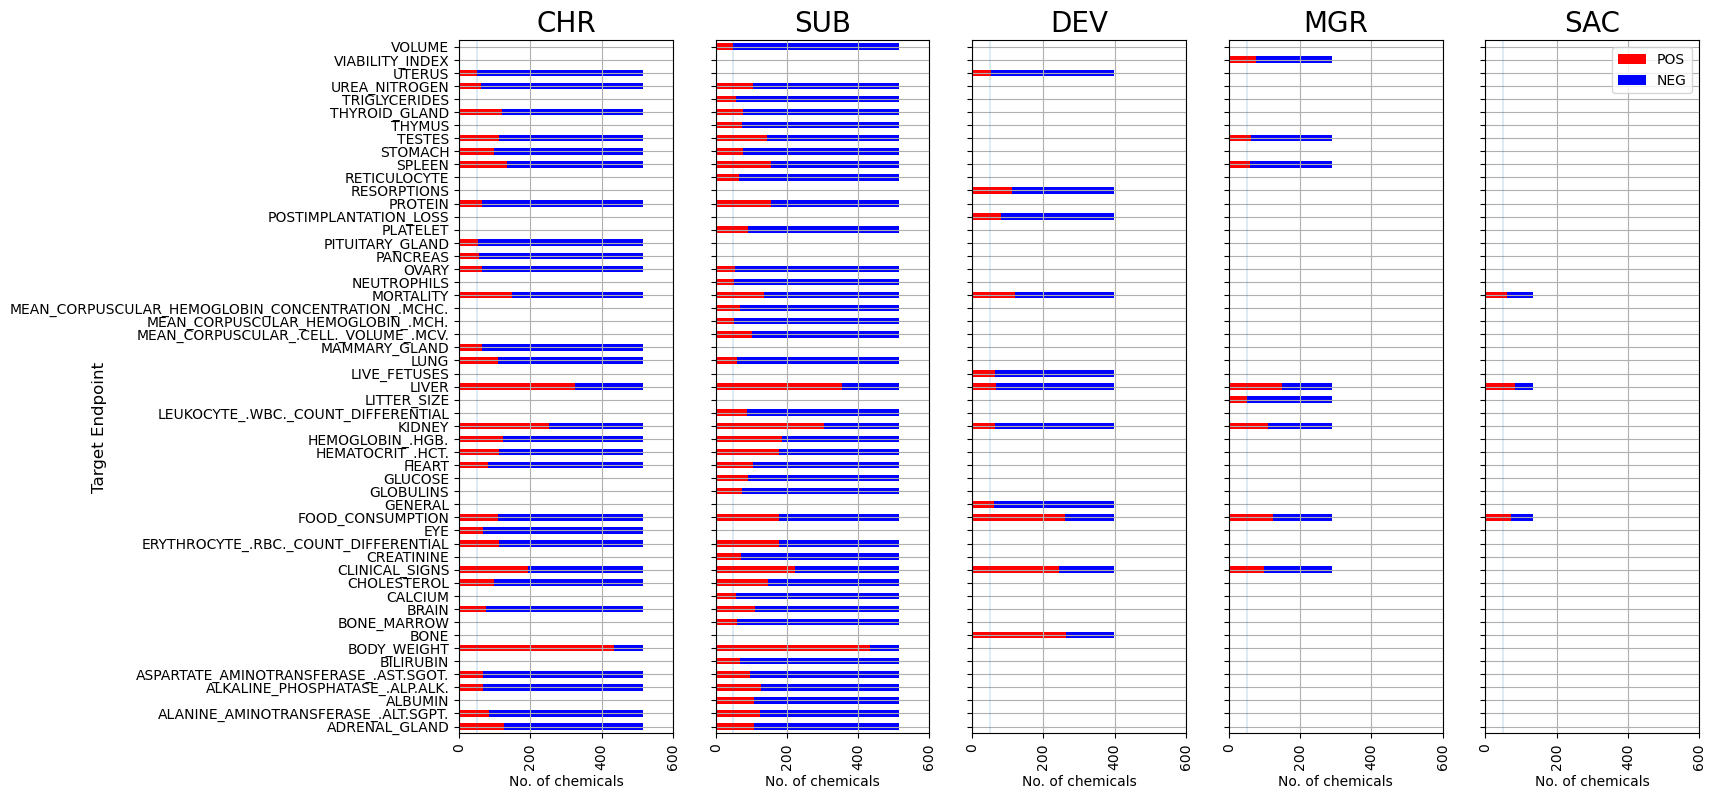

In [54]:
fig = plt.figure(figsize=(16,9))
plt.xlabel('No of chemicals')
STUDIES=['CHR','SUB','DEV', 'MGR', 'SAC']
k=0
for s in STUDIES:
    k+=1
    ax=plt.subplot(1,len(STUDIES),k)
    ax.vlines(50,-1,Dn.shape[0],linestyles='-',lw=0.2)
    Dn.loc[:,[(s, 'POS'),(s, 'NEG')]].plot.barh(stacked=True,legend=False,ax=ax,lw=0, color=['red','blue'])
    ax.set_title(s,fontdict=dict(size=20))
    frame1 = plt.gca()
    if k>1: 
        for ylab in ax.get_yticklabels():ylab.set_visible(False)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlim(0,700)
    ax.set_ylabel('')
    #ax.set_ylim(0,600)
    ax.grid(True)
    ax.set_xlim(0,600)
    ax.set_xlabel('No. of chemicals')
L=ax.legend()
L.get_texts()[0].set_text('POS')
L.get_texts()[1].set_text('NEG')
plt.gcf().text(-0.1,0.45, "Target Endpoint", ha="center", va="center", rotation=90, fontsize=12)
fig.savefig(figures_dir+'Figure1r.png', dpi = 300, bbox_inches = 'tight')

# ML

## Create Classifiers

In [55]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
#from sklearn.tree import DecisionTreeClassifier

from genra.rax.skl.cls import *

Est = [('Random Forest', RandomForestClassifier(random_state=42)),
          ('NB', BernoulliNB()),
          ('LR', LogisticRegression(max_iter=1000)),
          ('Gradient Boosting', GradientBoostingClassifier()),
          ('SVC', SVC(gamma='auto',probability=True)),
          ('KNN',KNeighborsClassifier()),
          ('ANN1',MLPClassifier(solver='sgd')),
          ('GenRA', GenRAPredClass(n_neighbors=10,metric='jaccard'))
      ]

### Model Validation Using Chm (mrgn) Descriptors

In [56]:
effects = ['dnt_clinical_signs', 'chr_body_weight', 'chr_liver', 'chr_kidney',
       'chr_spleen', 'chr_adrenal_gland', 'chr_lung', 'sub_body_weight',
       'sub_liver', 'sub_kidney', 'sub_spleen', 'sub_lung', 'mgr_liver',
       'mgr_kidney', 'mgr_spleen', 'sac_liver', 'dev_liver', 'dev_kidney']

In [57]:
for e in effects:
    print(e)

dnt_clinical_signs
chr_body_weight
chr_liver
chr_kidney
chr_spleen
chr_adrenal_gland
chr_lung
sub_body_weight
sub_liver
sub_kidney
sub_spleen
sub_lung
mgr_liver
mgr_kidney
mgr_spleen
sac_liver
dev_liver
dev_kidney


In [58]:
mydict = {}
for e in effects:
    data = getData(e,dt='chm',st='mrgn')
    mydict[e] = data
    

In [77]:
mydict['dnt_clinical_signs'][1].value_counts()

1    37
0    24
Name: dnt_clinical_signs, dtype: int64

In [61]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, f1_score, accuracy_score, precision_score
import time
from datetime import datetime
from functools import reduce 
def prTime(dt):
    hours, remainder = divmod(dt.total_seconds(), 3600)
    minutes, seconds = divmod(remainder, 60)
    return '{:02}:{:02}:{:02}'.format(int(hours), int(minutes), int(seconds))

cv = StratifiedKFold(n_splits = 5)

Res = []
for e in effects:
    X,Y = getData(e,dt='chm',st='mrgn')
    for (LR,Clf) in Est:
    #print('\n>>',LR)
    #start_time = datetime.now()
        score = cross_validate(Clf, X, Y,
                           cv=cv,
                          scoring= {'accuracy': make_scorer(accuracy_score),
                                     'f1': make_scorer(f1_score),
                                     'sensitivity': make_scorer(recall_score),
                                     'specificity': make_scorer(recall_score,pos_label=0),
                                    'precision': make_scorer(precision_score)},
                           n_jobs=-1, verbose=1)
    #elapsed_time = datetime.now() - start_time
        SC = pd.DataFrame(score)
        SC.insert(0,'LR',LR)
        Res.append(SC)
    #print("Done in {} h".format(prTime(elapsed_time)))
    mydict[e] = Res


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [82]:
#mydict['dnt_clinical_signs']

In [83]:
def model_cv(d,  label = None):
    
    Res = []
    Est = [('Random Forest', RandomForestClassifier(random_state=42)),
          ('NB', BernoulliNB()),
          ('LR', LogisticRegression(max_iter=1000)),
          ('Gradient Boosting', GradientBoostingClassifier()),
          ('SVC', SVC(gamma='auto',probability=True)),
          ('KNN',KNeighborsClassifier()),
          ('ANN1',MLPClassifier(solver='sgd')),
          ('GenRA', GenRAPredClass(n_neighbors=10,metric='jaccard'))]
    X, Y = d
    for (LR,Clf) in Est:
    #print('\n>>',LR)
    #start_time = datetime.now()
        score = cross_validate(Clf, X, Y,
                           cv=StratifiedKFold(n_splits = 5),
                           scoring= {'accuracy': make_scorer(accuracy_score),
                                     'f1': make_scorer(f1_score),
                                     'sensitivity': make_scorer(recall_score),
                                     'specificity': make_scorer(recall_score,pos_label=0),
                                    'precision': make_scorer(precision_score)},
                                n_jobs=-1, verbose=1)
    #elapsed_time = datetime.now() - start_time
        SC = pd.DataFrame(score)
        SC.insert(0,'LR',LR)
        Res.append(SC)
    return Res

In [84]:
def plugin(d, label=None):
    summary = {}
    X, Y = d
    summary['label'] = label
    summary['score'] = model_cv(d)
    
    return summary

In [85]:
#mydict['dnt_clinical_signs']

#### Testing function on individual datasets

In [86]:
plugin(mydict['chr_liver'], label = 'chr_liver')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

{'label': 'chr_liver',
 'score': [              LR  fit_time  score_time  test_accuracy   test_f1  \
  0  Random Forest  0.350607    0.021626       0.602740  0.747826   
  1  Random Forest  0.265742    0.027853       0.657534  0.782609   
  2  Random Forest  0.223526    0.028115       0.657534  0.782609   
  3  Random Forest  0.231436    0.025327       0.616438  0.730769   
  4  Random Forest  0.282497    0.020642       0.625000  0.732673   
  
     test_sensitivity  test_specificity  test_precision  
  0          0.895833          0.040000        0.641791  
  1          0.957447          0.115385        0.661765  
  2          0.957447          0.115385        0.661765  
  3          0.808511          0.269231        0.666667  
  4          0.787234          0.320000        0.685185  ,
     LR  fit_time  score_time  test_accuracy   test_f1  test_sensitivity  \
  0  NB  0.020816    0.013415       0.698630  0.792453          0.875000   
  1  NB  0.023646    0.014912       0.684932  0.78

In [87]:
chm_summaries = []
for k in list(mydict.keys()):
    try:
        chm_summaries.append(plugin(mydict[k], k))
    except Exception as error:
        print(k)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [88]:
len(chm_summaries)

18

In [89]:
len(chm_summaries)

18

In [90]:
chm_summaries[0].keys()

dict_keys(['label', 'score'])

In [91]:
chm_summaries[0]['label']

'dnt_clinical_signs'

In [92]:
df1 = pd.concat(chm_summaries[0]['score'])

In [93]:
#df1

In [94]:
df1.groupby('LR').aggregate(dict(test_f1=[np.mean,np.std],
                                    test_sensitivity=[np.mean,np.std],
                                    test_specificity=[np.mean,np.std],
                                    test_accuracy=[np.mean,np.std],
                                    test_precision=[np.mean,np.std],))\
    .round(decimals=3)

test_f1        test_sensitivity        test_specificity  \
                     mean    std             mean    std             mean   
LR                                                                          
ANN1                0.745  0.056            0.946  0.074             0.08   
GenRA               0.668  0.175            0.704  0.220             0.41   
Gradient Boosting   0.698  0.074            0.786  0.121             0.29   
KNN                 0.710  0.048            0.868  0.135             0.12   
LR                  0.723  0.107            0.850  0.224             0.29   
NB                  0.754  0.028            1.000  0.000             0.00   
Random Forest       0.744  0.051            0.950  0.112             0.08   
SVC                 0.754  0.028            1.000  0.000             0.00   

                         test_accuracy        test_precision         
                     std          mean    std           mean    std  
LR                                                                   
ANN1               0.179         0.606  0.091          0.616  0.058  
GenRA              0.188         0.592  0.187          0.640  0.139  
Gradient Boosting  0.225         0.588  0.108          0.636  0.090  
KNN                0.179         0.574  0.062          0.606  0.024  
LR                 0.175         0.622  0.115          0.646  0.065  
NB                 0.000         0.606  0.036          0.606  0.036  
Random Forest      0.110         0.605  0.076          0.614  0.037  
SVC                0.000         0.606  0.036          0.606  0.036

In [95]:
myperm2 = {}
myperm = {}
for i in range(len(chm_summaries)):
    k = chm_summaries[i]['label']
    Perf = pd.concat(chm_summaries[i]['score'])
    Perf_agg = Perf.groupby(['LR']).aggregate(dict(test_f1=[np.mean,np.std],
                                    test_sensitivity=[np.mean,np.std],
                                    test_specificity=[np.mean,np.std],
                                    test_accuracy=[np.mean,np.std],
                                    test_precision=[np.mean,np.std],))\
    .round(decimals=3)
    myperm[k] = Perf_agg
    myperm2[k] = Perf

In [96]:
Perf_mgrn = pd.concat(myperm)

In [97]:
Perf_mgrn_raw = pd.concat(myperm2)

In [98]:
Perf_mgrn_raw.head()

LR  fit_time  score_time  test_accuracy  \
dnt_clinical_signs 0  Random Forest  0.164990    0.028983       0.692308   
                   1  Random Forest  0.107878    0.017972       0.583333   
                   2  Random Forest  0.109167    0.017270       0.583333   
                   3  Random Forest  0.170545    0.025741       0.666667   
                   4  Random Forest  0.162586    0.029427       0.500000   

                       test_f1  test_sensitivity  test_specificity  \
dnt_clinical_signs 0  0.800000              1.00               0.2   
                   1  0.736842              1.00               0.0   
                   2  0.736842              1.00               0.0   
                   3  0.777778              1.00               0.2   
                   4  0.666667              0.75               0.0   

                      test_precision  
dnt_clinical_signs 0        0.666667  
                   1        0.583333  
                   2        0.583333  
                   3        0.636364  
                   4        0.600000

## Generate Raw F, Recall, Precsion 1 table

In [99]:
Perf_mgrn_raw.to_csv(D1 + '/ML_comparision_mrgn_all_140823.csv' )
Perf_mgrn.to_csv(D1 + '/ML_comparision_mrgn_all_mean_140823.csv' )

### Generate Average F1 figures and tables

In [100]:
#Perf_mgrn_raw.index.unique()

In [101]:
Perf_mgrn1 = Perf_mgrn_raw.reset_index()
#Perf_mgrn1[Perf_mgrn1['level_0'] == 'dnt_clinical_signs']

In [102]:
Perf_mgrn1[Perf_mgrn1['level_0'] == 'chr_liver'].head()

,level_0,level_1,LR,fit_time,score_time,test_accuracy,test_f1,test_sensitivity,test_specificity,test_precision
80,chr_liver,0,Random Forest,0.243848,0.020977,0.602740,0.747826,0.895833,0.040000,0.641791
81,chr_liver,1,Random Forest,0.236972,0.021376,0.657534,0.782609,0.957447,0.115385,0.661765
82,chr_liver,2,Random Forest,0.307933,0.018087,0.657534,0.782609,0.957447,0.115385,0.661765
83,chr_liver,3,Random Forest,0.229598,0.021755,0.616438,0.730769,0.808511,0.269231,0.666667
84,chr_liver,4,Random Forest,0.307209,0.018276,0.625000,0.732673,0.787234,0.320000,0.685185


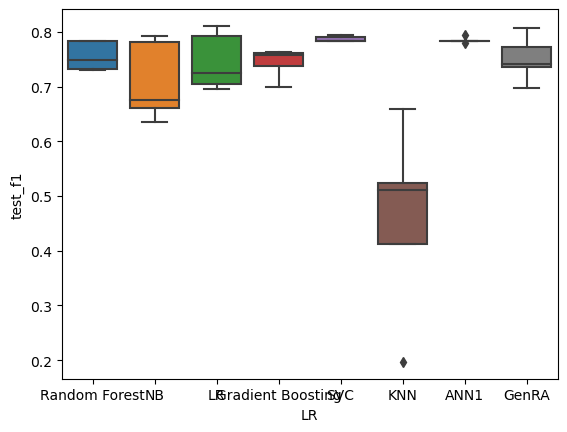

In [103]:
g = sns.boxplot(y = 'test_f1', x = 'LR',  data = Perf_mgrn1[Perf_mgrn1['level_0'] == 'chr_liver'])
#g.set_xticklabels(chm_chrliv.get_xticklabels(), rotation=90);

[Text(0, 0, 'Random Forest'),
 Text(1, 0, 'NB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'Gradient Boosting'),
 Text(4, 0, 'SVC'),
 Text(5, 0, 'KNN'),
 Text(6, 0, 'ANN1'),
 Text(7, 0, 'GenRA')]

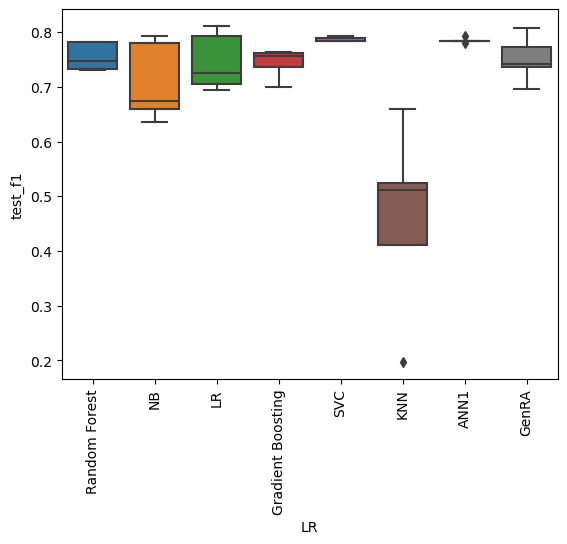

In [104]:
import seaborn as sns
%matplotlib inline

chm_chrliv = sns.boxplot(x='LR', y='test_f1', data = Perf_mgrn1[Perf_mgrn1['level_0'] == 'chr_liver'])
chm_chrliv.set_xticklabels(chm_chrliv.get_xticklabels(), rotation=90)

## Model Validation Using Bio (gene hitc) Descriptors

In [105]:
bio_dict = {}
for e in effects:
    data = getData(e,dt='bio',st='gene')
    bio_dict[e] = data

In [106]:
#bio_dict

In [107]:
bio_summaries = []
for k in list(bio_dict.keys()):
    try:
        bio_summaries.append(plugin(bio_dict[k], k))
    except Exception as error:
        print(k)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [108]:
bio_perm2 = {}
bio_perm = {}
for i in range(len(bio_summaries)):
    k = bio_summaries[i]['label']
    Perf = pd.concat(bio_summaries[i]['score'])
    Perf_agg = Perf.groupby(['LR']).aggregate(dict(test_f1=[np.mean,np.std],
                                    test_sensitivity=[np.mean,np.std],
                                    test_specificity=[np.mean,np.std],
                                    test_accuracy=[np.mean,np.std],
                                    test_precision=[np.mean,np.std],))\
    .round(decimals=3)
    bio_perm[k] = Perf_agg
    bio_perm2[k] = Perf

In [109]:
#bio_summaries

In [110]:
Perf_bio = pd.concat(bio_perm)  
Perf_bio_raw = pd.concat(bio_perm2)  

### Generate Raw F1 table

In [111]:
Perf_bio.to_csv(D1 + '/ML_comparision_bio_all_summary_140823.csv' )
Perf_bio_raw.to_csv(D1 + '/ML_comparision_bio_all_140823.csv' )

### Generate Average F1 figures and tables

In [112]:
Perf_bio1 = Perf_bio_raw.reset_index()

[Text(0, 0, 'Random Forest'),
 Text(1, 0, 'NB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'Gradient Boosting'),
 Text(4, 0, 'SVC'),
 Text(5, 0, 'KNN'),
 Text(6, 0, 'ANN1'),
 Text(7, 0, 'GenRA')]

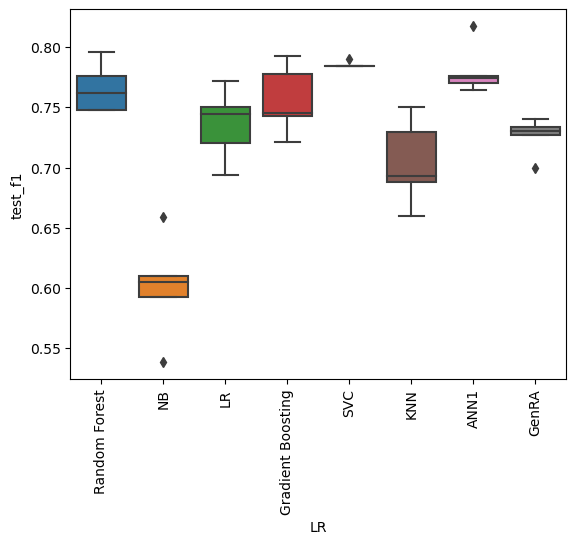

In [113]:
g1 = sns.boxplot(x='LR', y='test_f1', data = Perf_bio1[Perf_bio1['level_0'] == 'chr_liver'])
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)

## Model Validation Using Hybrid (chm(mrgn) + bio(hitc)) Descriptors

In [114]:
hybrid_dict = {}
for e in effects:
    data = getData(e,dt='bc',st='gene_mrgn')
    hybrid_dict[e] = data

In [115]:
hybrid_summaries = []
for k in list(hybrid_dict.keys()):
    try:
        hybrid_summaries.append(plugin(hybrid_dict[k], k))
    except Exception as error:
        print(k)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [116]:

myperm2 = {}
myperm = {}
for i in range(len(hybrid_summaries)):
    k = hybrid_summaries[i]['label']
    Perf = pd.concat(hybrid_summaries[i]['score'])
    Perf_agg = Perf.groupby(['LR']).aggregate(dict(test_f1=[np.mean,np.std],
                                    test_sensitivity=[np.mean,np.std],
                                    test_specificity=[np.mean,np.std],
                                    test_accuracy=[np.mean,np.std],
                                    test_precision=[np.mean,np.std],))\
    .round(decimals=3)
    myperm[k] = Perf_agg
    myperm2[k] = Perf

In [117]:
Perf_hybrid = pd.concat(myperm)  
Perf_hybrid_raw = pd.concat(myperm2) 

### Generate Raw F1 table

In [118]:
Perf_hybrid_raw.to_csv(D1 + '/ML_comparision_hybrid_all_140823.csv' )
Perf_hybrid.to_csv(D1 + '/ML_comparision_hybrid_all_summary_140823.csv' )

In [119]:
Perf_hybrid1 = Perf_hybrid_raw.reset_index()

### Generate Average F1 figures and tables

[Text(0, 0, 'Random Forest'),
 Text(1, 0, 'NB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'Gradient Boosting'),
 Text(4, 0, 'SVC'),
 Text(5, 0, 'KNN'),
 Text(6, 0, 'ANN1'),
 Text(7, 0, 'GenRA')]

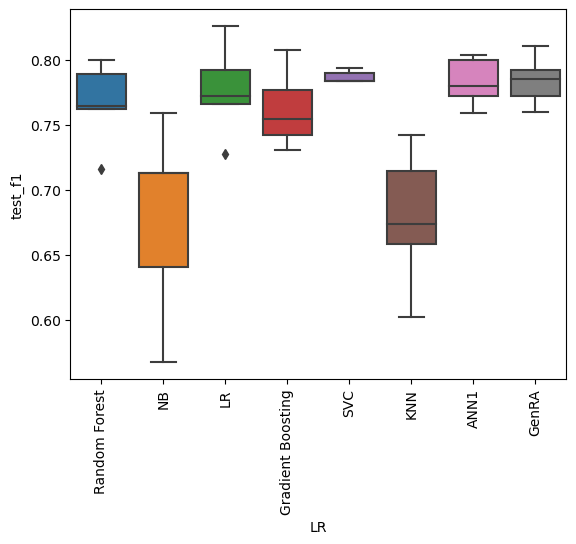

In [120]:
g2 = sns.boxplot(x='LR', y='test_f1', data = Perf_hybrid1[Perf_hybrid1['level_0'] =='chr_liver'])
g2.set_xticklabels(g2.get_xticklabels(), rotation=90)

## Model Validation Using All Chm (mrgn + tptr + toxp) Descriptors

In [121]:
ca_dict = {}
for e in effects:
    data = getData(e,dt='chm',st='all')
    ca_dict[e] = data




In [122]:
ca_summaries = []
for k in list(ca_dict.keys()):
    try:
        ca_summaries.append(plugin(ca_dict[k], k))
    except Exception as error:
        print(k)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [123]:
ca_perm2 = {}
ca_perm = {}
for i in range(len(ca_summaries)):
    k = ca_summaries[i]['label']
    Perf = pd.concat(ca_summaries[i]['score'])
    Perf_agg = Perf.groupby(['LR']).aggregate(dict(test_f1=[np.mean,np.std],
                                    test_sensitivity=[np.mean,np.std],
                                    test_specificity=[np.mean,np.std],
                                    test_accuracy=[np.mean,np.std],
                                    test_precision=[np.mean,np.std],))\
    .round(decimals=3)
    ca_perm[k] = Perf_agg
    ca_perm2[k] = Perf
    

In [124]:
Perf_ca = pd.concat(ca_perm)  
Perf_ca_raw = pd.concat(ca_perm2)  

In [125]:
Perf_ca1 = Perf_ca_raw.reset_index()

In [126]:
Perf_ca1.head()

,level_0,level_1,LR,fit_time,score_time,test_accuracy,test_f1,test_sensitivity,test_specificity,test_precision
0,dnt_clinical_signs,0,Random Forest,0.205120,0.050451,0.692308,0.800000,1.000,0.2,0.666667
1,dnt_clinical_signs,1,Random Forest,0.151460,0.028048,0.583333,0.736842,1.000,0.0,0.583333
2,dnt_clinical_signs,2,Random Forest,0.129074,0.028835,0.583333,0.736842,1.000,0.0,0.583333
3,dnt_clinical_signs,3,Random Forest,0.189846,0.030155,0.666667,0.777778,1.000,0.2,0.636364
4,dnt_clinical_signs,4,Random Forest,0.177010,0.027164,0.583333,0.736842,0.875,0.0,0.636364


### Generate Raw F1 table

In [127]:
Perf_ca.to_csv(D1 + '/ML_comparision_ca_all_summary_140823.csv') 
Perf_ca_raw.to_csv(D1 + '/ML_comparision_ca_all_140823.csv')

### Generate Average F1 figures and tables

[Text(0, 0, 'Random Forest'),
 Text(1, 0, 'NB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'Gradient Boosting'),
 Text(4, 0, 'SVC'),
 Text(5, 0, 'KNN'),
 Text(6, 0, 'ANN1'),
 Text(7, 0, 'GenRA')]

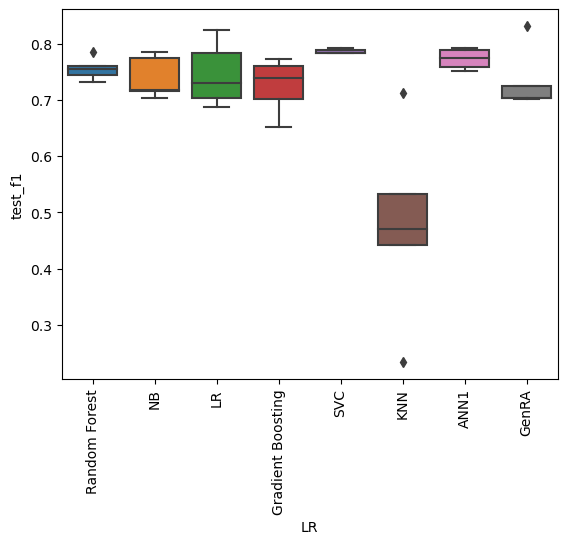

In [128]:
g4 = sns.boxplot(x='LR', y='test_f1', data = Perf_ca1[Perf_ca1['level_0'] == 'chr_liver'])
g4.set_xticklabels(g4.get_xticklabels(), rotation=90)

## Model Validation Using All Chm + bio (mrgn + tptr + toxp + bio) Descriptors

In [129]:
bc_dict = {}
for e in effects:
    data = getData(e,dt='bc',st='gene_all')
    bc_dict[e] = data

In [130]:
bc_summaries = []
for k in list(bc_dict.keys()):
    try:
        bc_summaries.append(plugin(bc_dict[k], k))
    except Exception as error:
        print(k)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [131]:
bc_perm2 = {}
bc_perm = {}
for i in range(len(bc_summaries)):
    k = bc_summaries[i]['label']
    Perf = pd.concat(bc_summaries[i]['score'])
    Perf_agg = Perf.groupby(['LR']).aggregate(dict(test_f1=[np.mean,np.std],
                                    test_sensitivity=[np.mean,np.std],
                                    test_specificity=[np.mean,np.std],
                                    test_accuracy=[np.mean,np.std],
                                    test_precision=[np.mean,np.std],))\
    .round(decimals=3)
    bc_perm[k] = Perf_agg
    bc_perm2[k] = Perf

In [132]:
Perf_bc = pd.concat(bc_perm)  
Perf_bc_raw = pd.concat(bc_perm2)  

## Generate Raw F1 table

In [133]:
Perf_bc_raw.to_csv(D1 + '/ML_comparision_cba_all_140823.csv' )
Perf_bc.to_csv(D1 + '/ML_comparision_cba_all_summary_140823.csv' )

In [134]:
Perf_cba1 = Perf_bc_raw.reset_index()

### Generate Average F1 figures and tables

[Text(0, 0, 'Random Forest'),
 Text(1, 0, 'NB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'Gradient Boosting'),
 Text(4, 0, 'SVC'),
 Text(5, 0, 'KNN'),
 Text(6, 0, 'ANN1'),
 Text(7, 0, 'GenRA')]

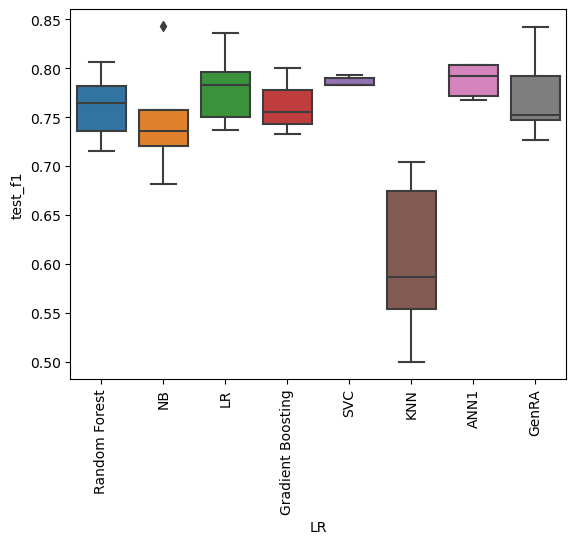

/home/grace/anaconda3/envs/aim/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/grace/anaconda3/envs/aim/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/grace/anaconda3/envs/aim/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/grace/anaconda3/envs/aim/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precisio

In [135]:
g5 = sns.boxplot(x='LR', y='test_f1', data = Perf_cba1[Perf_cba1['level_0'] == 'chr_liver'])
g5.set_xticklabels(g5.get_xticklabels(), rotation=90)